In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter



code/text borrowed from: 
- https://stackabuse.com/kernel-density-estimation-in-python-using-scikit-learn/
- http://www.datasciencecourse.org/notes/visualization/
- https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html
- http://www.stat.cmu.edu/~hseltman/309/Book/Book.pdf

## Graphical EDA (Exploratory data analysis)  

### About: 

- exploratory data analysis aims to summarize a dataset’s main characteristics (often visually), in hopes of revealing interesting information or patterns to the analyst.

- You should always perform appropriate EDA before further analysis of your data. 

- Perform whatever steps are necessary to become more familiar with your data, check for obvious mistakes, learn about variable distributions, and learn about relationships between variables. 

- EDA is not an exact science – it is a very important art!

- histograms are one of the best ways to quickly learn a lot about your data, including central tendency, spread, modality, shape and outliers.

In [5]:
df = pd.read_csv("~/downloads/Bihar_sample_data.csv") #Load the data

In [6]:
df

,personid,female,adult,age,height_cm,weight_kg
0,11010101,0.0,1.0,70.0,164.1,48.9
1,11010102,0.0,1.0,32.0,157.3,44.0
2,11010103,1.0,1.0,28.0,150.3,37.7
3,11010104,0.0,0.0,12.0,146.2,30.7
4,11010105,1.0,0.0,11.0,135.1,30.2
...,...,...,...,...,...,...
39548,24282403,0.0,1.0,38.0,156.1,60.7
39549,24282404,1.0,1.0,28.0,148.9,46.7
39550,24282405,1.0,0.0,7.0,116.3,17.7
39551,24282406,0.0,0.0,6.0,101.5,13.4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39553 entries, 0 to 39552
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   personid   39553 non-null  int64  
 1   female     39552 non-null  float64
 2   adult      39539 non-null  float64
 3   age        39539 non-null  float64
 4   height_cm  33138 non-null  float64
 5   weight_kg  33490 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.8 MB



### About Histogram: 

- Histograms are the workhorse of exploratory data analysis. They are indispensable for quickly understanding the distribution of values that a particular feature takes on. 

- A histogram is a rough estimate of the probability distribution function of a continuous variable. 

- We obtain it by binning the data and simply counting the number of observations within each bin.

- We can also divide by the total number of observations obtain the density: the proportion of cases that are within each bin. 

- To manually construct a histogram, define the range of data for each bar (called a bin), count how many cases fall in each bin, and draw the bars high enough to indicate the count.

- It makes sense for categorical data is the histogram (basically just a barplot of the tabulation of the data)

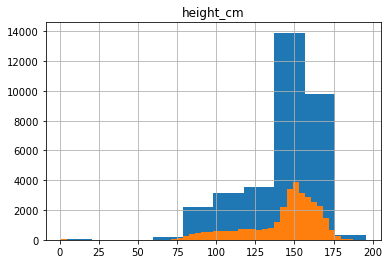

In [39]:
#We can construct a histogram using the plt.hist() command as in the following code.

plt.hist(df['height_cm'], bins=50);

Lets also create some data drawn from two normal distributions

In [20]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

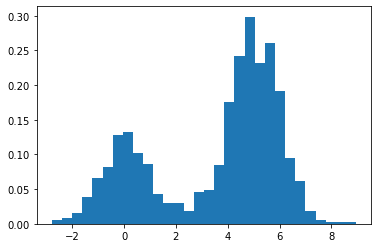

In [23]:
hist = plt.hist(x, bins=30, density=True)


 large bins and too many outliers seem to be pertinent issues. For example, there are data points that exist which indicate that some adult females in Bihar are 0 centimeters tall which cannot be correct. Additionally, the larger bin size may hide interesting patterns in the data.

In [9]:
df_new = df[(df['height_cm'] >120) & (df['height_cm'] <200) & (df['female'] ==1)]

In [10]:
df_new

,personid,female,adult,age,height_cm,weight_kg
2,11010103,1.0,1.0,28.0,150.3,37.7
4,11010105,1.0,0.0,11.0,135.1,30.2
6,11010202,1.0,1.0,30.0,139.7,57.3
9,11010205,1.0,0.0,16.0,153.1,43.9
11,11010207,1.0,1.0,35.0,147.5,38.9
...,...,...,...,...,...,...
39542,24282301,1.0,1.0,43.0,154.9,53.6
39543,24282302,1.0,1.0,23.0,156.5,45.4
39545,24282304,1.0,0.0,16.0,146.3,36.9
39547,24282402,1.0,1.0,53.0,140.8,45.7


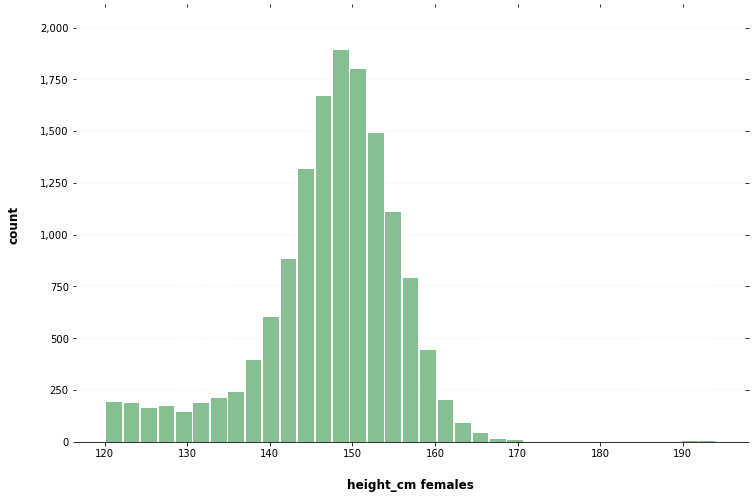

In [11]:
ax = df_new.hist(column='height_cm', bins=35, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("height_cm females", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("count", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


### how to pick bin size?

- Generally you will choose between about 5 and 30 bins, depending on the amount of data and the shape of the distribution. 

- Of course you need to see the histogram to know the shape of the distribution, so this may be an iterative process.

- So the choice between the size of the bin is always a choice between how much information I want to try to convey from my underlying data versus how much noise I'm willing to tolerate. So the trade-off in the size of the bin is always between bias and variance.

- In other words, Defining bin width is a choice between how much information to convey versus how much knowledge can be tolerated. Bins which are too narrow show too much individual data (some of which happens by chance!) and does not allow an underlying pattern to be identified easily because there may be holes or outliers. Bins which are too wide may also camouflage interesting patterns.

------------------------------------------------------------------------------------


### The Kernel Density Estimation

- Estimating the shape of the data: a density estimator is an algorithm which seeks to model the probability distribution that generated a dataset. For one dimensional data, we have seen one simple density estimator: the histogram. A histogram divides the data into discrete bins, counts the number of points that fall in each bin, and then visualizes the results in an intuitive manner.

-  One of the issues with using a histogram as a density estimator is that the choice of bin size and location can lead to representations that have qualitatively different features. 

- Probability density function: In probability theory, a probability density function (PDF), or density of a continuous random variable,  is a function whose value at any given sample (or point) in the sample space (the set of possible values taken by the random variable) can be interpreted as providing a relative likelihood that the value of the random variable would equal that sample

- Kernel density estimation is a non-parametric way to estimate the probability density function of a random variable. Straightforward extension of the histogram: at each point we take a weighted average of the frequency of the observations


In [24]:
from sklearn.neighbors import KernelDensity


In [26]:
model = KernelDensity()


In [27]:
def generate_data(seed=17):
    # Fix the seed to reproduce the results
    rand = np.random.RandomState(seed)
    x = []
    dat = rand.lognormal(0, 0.3, 1000)
    x = np.concatenate((x, dat))
    dat = rand.normal(3, 1, 1000)
    x = np.concatenate((x, dat))
    return x


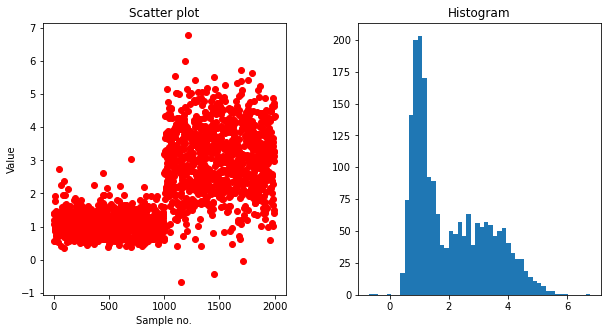

In [28]:
x_train = generate_data()[:, np.newaxis]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plt.subplot(121)
plt.scatter(np.arange(len(x_train)), x_train, c='red')
plt.xlabel('Sample no.')
plt.ylabel('Value')
plt.title('Scatter plot')
plt.subplot(122)
plt.hist(x_train, bins=50)
plt.title('Histogram')
fig.subplots_adjust(wspace=.3)
plt.show()

In [29]:
x_test = np.linspace(-1, 7, 2000)[:, np.newaxis]


In [30]:
model = KernelDensity()
model.fit(x_train)
log_dens = model.score_samples(x_test)

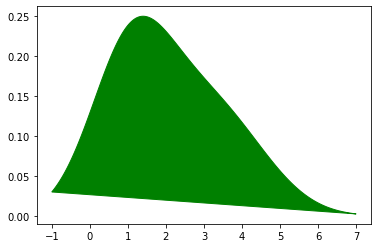

In [34]:
plt.fill(x_test, np.exp(log_dens), c='green')
plt.show()

The free parameters of kernel density estimation are the kernel, which specifies the shape of the distribution placed at each point, and the kernel bandwidth, which controls the size of the kernel at each point. In practice, there are many kernels you might use for a kernel density estimation: in particular, the Scikit-Learn KDE implementation supports one of six kernels, which you can read about in Scikit-Learn's Density Estimation documentation.



## Scatter matrices


The catch-all for visualizing high dimensional data is the scatter matrix. This plot shows all pairwise visualizations across all dimensions of the data set. Assume three dimensions that are real for example, it will include a scatter plot of the first dimension versus the second, the first versus the third, and the second versus the third. It plots these in a matrix form, as shown below. Matplotlib doesn’t actually have a routine for this, but the pandas library does, and we can just use this one.
 
 


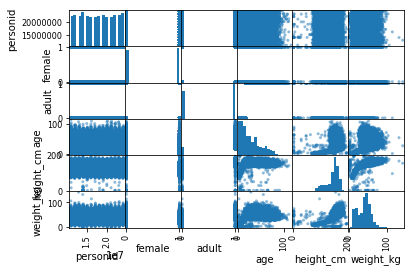

In [54]:
pd.plotting.scatter_matrix(df, hist_kwds={'bins':20});

### Scatter plots — numeric x numeric


If both dimensions of the data are numeric, the most natural first type of plot to consider is the scatter plot: plotting points that simply correspond to the different coordinates of the data.

For two quantitative variables, the basic graphical EDA technique is the scatterplot
which has one variable on the x-axis, one on the y-axis and a point for each case
in your dataset. If one variable is explanatory and the other is outcome, it is a
very, very strong convention to put the outcome on the y (vertical) axis.

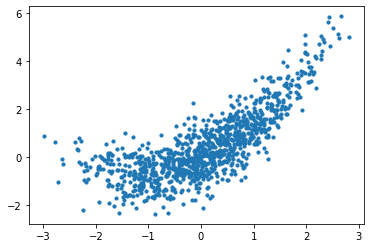

In [43]:
x = np.random.randn(1000)
y = 0.4*x**2 + x + 0.7*np.random.randn(1000)
plt.scatter(x,y,s=10)


The scatter plot gives one of the most complete views of the data, since every data point is plotted in the visualization. It also gives a good visual indication of the “density” of the points. However, there is also a natural failure mode, where there are too many points to clearly separate, and the plot loses its ability to indicate the density of the data. For example, if we have 10 times as many points, the plot is no longer as clear at indicating the density in the interior of the “density” (although for this particular case we could also just reduce the size of the points to improve this particular case, but we don’t largely for illustration purposes).

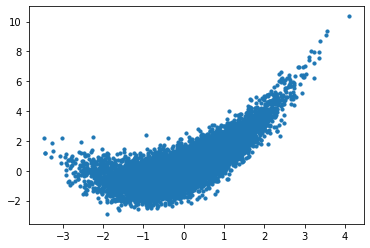

In [44]:
x = np.random.randn(10000)
y = 0.4*x**2 + x + 0.7*np.random.randn(10000)
plt.scatter(x,y,s=10)

In this case of excess data, we can also create a 2D histogram of the data (which bins the data along both dimensions), and indicate the “height” of each block via a color map. Such plots can more clearly indicate the density of points within the regions that are just solid color in the original scatter plot. These 2D histograms are sometimes also called heatmaps, but this name often conflicts with similar versions used for plotting 2d categorical data, so we’ll use the term 2D histogram here.



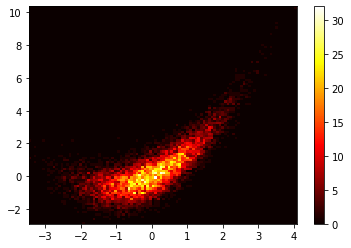

In [45]:
plt.hist2d(x,y,bins=100);
plt.colorbar();
plt.set_cmap('hot')


### Line plots — numeric x numeric (sequential)


For two dimensional data where one of the dimensions in naturally sequential (this comes up often, for instance, when monitoring a time series, so that one of the two dimensions of each data point is time). Because the sequential dimension is numeric (interval or ratio), in this case (unlike the bar charts mentioned above), it does make sense to explicitly draw lines between the data points. Note that occasionally (if the data is sampled at regular intervals), this sometime considered to be one-dimensional data, but in this case the first dimension is an implicit sequential series, so we still consider the data to be two dimensional. The following examples illustrates how to use the plt.plot for a simple line plot.



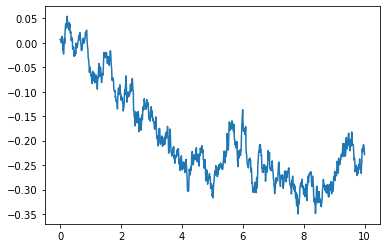

In [46]:
x = np.linspace(0,10,1000)
y = np.cumsum(0.01*np.random.randn(1000))
plt.plot(x,y)

### Box and whiskers and violin plots — categorical x numeric

- When one dimension is numeric and one is categorical, we usually can no longer use a scatter plot: if we were to simply discretize the categorical dimension, the the points would overlap to the extent that it would be difficult to assess the distribution of the points for each categorical variable. 


- Boxplots are very good at presenting information about the central tendency, symmetry and skew, as well as outliers, although they can be misleading about aspects such as multimodality. One of the best uses of boxplots is in the form of side-by-side boxplots


- boxplot consists of a rectangular box bounded above and below by “hinges” that represent the quartiles Q3 and Q1 respectively, and with a horizontal “median”

- You can also see the upper and lower “whiskers”, and a point marking an “outlier”. The vertical axis is in the units of the quantitative variable.


### interquartile range: 


The quartiles of a population or a sample are the three values which divide the distribution or observed data into
even fourths. So one quarter of the data fall below the first quartile, usually written
Q1; one half fall below the second quartile (Q2); and three fourths fall below the
third quartile (Q3). The astute reader will realize that half of the values fall above
Q2, one quarter fall above Q3, and also that Q2 is a synonym for the median.
Once the quartiles are defined, it is easy to define the IQR as IQR = Q3 − Q1.
By definition, half of the values (and specifically the middle half) fall within an
interval whose width equals the IQR. If the data are more spread out, then the
IQR tends to increase, and vice versa.

#### Example: 
    
    Let’s consider a simple example, where here (just with fictitious data), we’re plotting pet type versus weight.


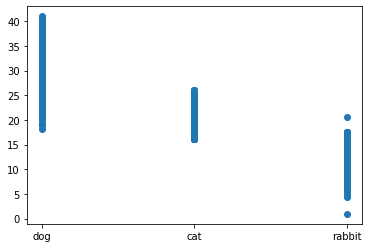

In [47]:
data= {"dog": 30 + 4*np.random.randn(1000),
       "cat": 16 + 10*np.random.rand(700),
       "rabbit": 12 + 3*np.random.randn(300)}
plt.scatter(np.concatenate([i*np.ones(len(x)) for i,x in enumerate(data.values())]),
            np.concatenate(list(data.values())))
plt.xticks(range(len(data)), data.keys());


Obviously very little can be determined by looking at just this plot, as there is not enough information in the dense line of points to really understand the distribution of the numeric variable for each point. A common strategy here is to use a box-and-whiskers plot, which plots the median of the data (as the line in the middle of the box), the 25th and 75th percentiles of the data (as the bottom and top of the box), the “whiskers” are set by a number of different possible conventions (by default Matplotlib uses 1.5 times the interquartile range, the distance between the 25th and 75th percentile), and any points outside this range (“outliers”) plotted individually.



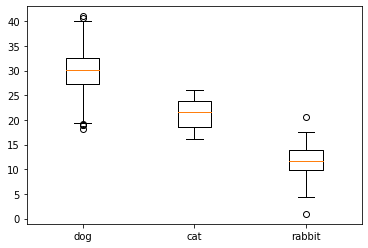

In [48]:
plt.boxplot(data.values())
plt.xticks(range(1,len(data)+1), data.keys());

Of course, just like the means and standard deviations do not fully describe a data set, the box and whisker statistics don’t fully capture the distribution of the data. For this reason, it’s also common to see violin plots, which create mini-histograms (symmetrized, largely for aesthetic purposes) in the vertical direction for each category. The advantage of these plots is that they carry a great deal of information about the actual distributions over each categorical variable, so are typically going to give more information especially when there is sufficient data to build this histogram.



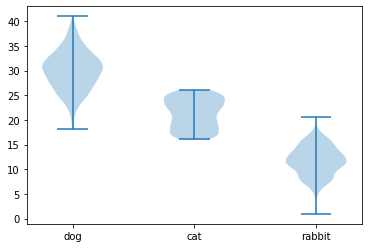

In [50]:
plt.violinplot(data.values())
plt.xticks(range(1,len(data)+1), data.keys());

### Takeaway: 

Boxplots show robust measures of location and spread as well as providing information about symmetry and outliers.

### Heat map and bubble plots — categorical x categorical
When both dimensions of our 2D data are categorical, we have even less information to use. Again, the goal will be to provide some kind of indication about the total counts of every possible combination between the two data sets. For example, considering a fictitious data set of pet-type vs. house type:



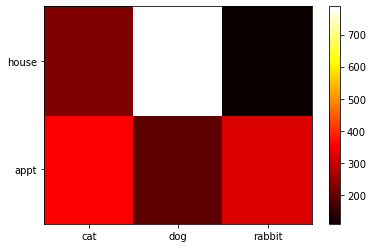

In [51]:

types = np.array([('dog', 'house'), ('dog', 'appt'), 
                  ('cat', 'house'), ('cat', 'appt'), 
                  ('rabbit', 'house'), ('rabbit', 'appt')])
data = types[np.random.choice(range(6), 2000, p=[0.4, 0.1, 0.12, 0.18, 0.05, 0.15]),:]

label_x, x = np.unique(data[:,0], return_inverse=True)
label_y, y = np.unique(data[:,1], return_inverse=True)
M, xt, yt, _ = plt.hist2d(x,y, bins=(len(label_x), len(label_y)))
plt.xticks((xt[:-1]+xt[1:])/2, label_x)
plt.yticks((yt[:-1]+yt[1:])/2, label_y)
plt.colorbar()